**🔹 1. Subir archivo .csv desde tu computadora**

In [57]:
# Subir archivo .csv a Colab "usar solo la primera vez"
from google.colab import files
uploaded = files.upload()


**2. Importar librerías necesarias**

In [58]:
# Librerías para manejo de datos y modelo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


“Estas líneas importan funciones que me permiten dividir los datos, crear el modelo de Random Forest, y evaluar si funcionó bien. En pocas palabras, con esto puedo entrenar, predecir y analizar si el modelo detecta correctamente el fraude.”

**3. Cargar y explorar el dataset**

In [59]:
# Cargar el archivo CSV
df = pd.read_csv("tarjetasdecredito.csv")

# Mostrar las primeras filas
print("Primeras 5 transacciones:")
print(df.head())

# Verificar el número de transacciones fraudulentas y legítimas
print("\nCantidad de transacciones por clase:")
print(df["Class"].value_counts())


Primeras 5 transacciones:
    Time  Amount        V1        V2        V3        V4        V5  Class
0  63869    9.82  0.773481 -1.305292 -0.261282  0.339474 -0.052024      1
1  16924    2.57 -0.159842 -0.502890 -0.327222  1.688096 -0.139804      1
2  79400    4.30  0.325822 -0.886489  0.475749 -0.444993  0.959274      1
3  78616   77.03  0.653669  1.671221  0.497238  1.858077 -0.211769      1
4  23289   14.55  0.419666 -0.262296  0.107316  0.337687 -0.894141      0

Cantidad de transacciones por clase:
Class
1    1000
0    1000
Name: count, dtype: int64


“Primero cargamos el archivo con las transacciones usando pandas.
Luego mostramos las primeras 5 filas para ver cómo son los datos.
Finalmente, contamos cuántas transacciones son fraude y cuántas son normales.
Esto nos ayuda a ver que los datos están desequilibrados, porque hay muchas más transacciones normales que fraudulentas.”

**4. Visualizar el desbalance de clases**

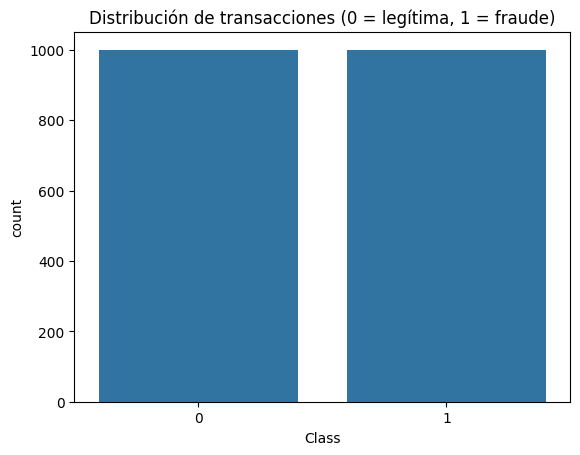

In [60]:
# Visualizar desbalance entre transacciones legítimas (0) y fraudulentas (1)
sns.countplot(data=df, x="Class")
plt.title("Distribución de transacciones (0 = legítima, 1 = fraude)")
plt.show()


“Con este gráfico mostramos visualmente cuántas transacciones son normales y cuántas son fraude.

La mayoría de barras están en el número 0, que representa transacciones legítimas.
La barra del número 1, que es el fraude, es mucho más pequeña.
Esto confirma que nuestros datos están muy desequilibrados, y por eso es importante usar un modelo como Random Forest que maneje bien ese tipo de casos.”

**5. Separar variables predictoras (X) y variable objetivo (y)**

In [61]:
# Separar las variables
X = df.drop("Class", axis=1)  # Variables predictoras
y = df["Class"]               # Variable objetivo (0 o 1)


“Aquí separamos las variables que usaremos para entrenar el modelo.

X contiene toda la información de la transacción, como el monto, la hora y las otras características.

y es la columna 'Class', que indica si la transacción fue fraude (1) o normal (0).
Es decir, el modelo va a usar X para aprender a predecir el valor de y.”

**6. Dividir en datos de entrenamiento y prueba**

In [62]:
# 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


“Aquí dividimos los datos en dos partes:
el 70% lo usamos para entrenar el modelo, y el 30% para probar si aprendió bien.
Esto se hace con la función **train_test_split.**

Además, usamos **stratify=y** para asegurarnos de que en ambas partes haya más o menos la misma proporción de fraudes y transacciones normales.

**7. Crear y entrenar modelo Random Forest**

In [63]:
# Crear el clasificador Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

“Aquí creamos nuestro modelo de Random Forest.
Le decimos que use 100 árboles de decisión para tomar sus decisiones.
Después, usamos **.fit()** para entrenarlo con los datos de entrenamiento que separamos antes.”

🧠 Ejemplo:

“Es como crear un equipo de 100 expertos. Cada uno aprende con los ejemplos y, cuando llega una transacción nueva, todos votan si es fraude o no. La mayoría gana.”

**8. Hacer predicciones y evaluar el modelo**

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.5049    0.5167    0.5107       300
           1     0.5051    0.4933    0.4992       300

    accuracy                         0.5050       600
   macro avg     0.5050    0.5050    0.5049       600
weighted avg     0.5050    0.5050    0.5049       600



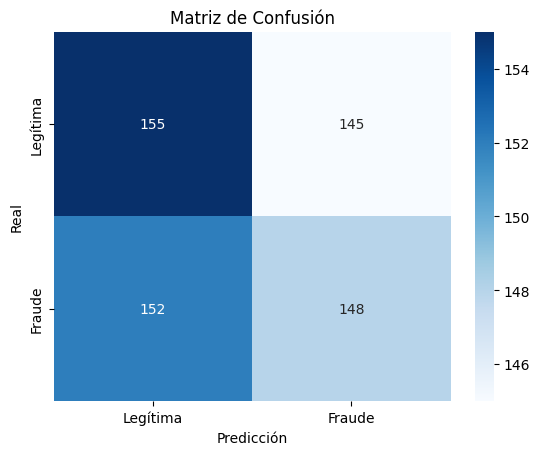

In [64]:
# Predecir con los datos de prueba
y_pred = model.predict(X_test)

# Reporte de métricas
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legítima", "Fraude"], yticklabels=["Legítima", "Fraude"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


“Ahora ponemos a prueba el modelo con datos que nunca ha visto.
Primero, predecimos si cada transacción es fraude o no **(y_pred)**.

Después usamos **classification_report** para ver si acertó:

- Nos dice qué tan preciso fue el modelo

- Cuántos fraudes detectó

- Qué tan bien evitó falsos positivos

Finalmente, mostramos una matriz de confusión, que es una tabla donde vemos:

- Cuántas predicciones fueron correctas

- Cuántas veces se equivocó el modelo”

**9. Probar con una transacción nueva (simulada)**

In [65]:
# Crear una transacción de prueba (mismo formato que los datos originales)
nueva_transaccion = pd.DataFrame([{
    'Time': 25000,
    'Amount': 95.60,
    'V1': -1.2,
    'V2': 0.4,
    'V3': -0.6,
    'V4': 0.2,
    'V5': -0.7
}])

# Predecir si es fraude o no
prediccion = model.predict(nueva_transaccion)
print("¿Es fraude?", "Sí" if prediccion[0] == 1 else "No")


¿Es fraude? Sí


“Aquí estamos simulando una transacción nueva, como si acabara de ocurrir.
Le damos al modelo los datos de esa transacción y le pedimos que prediga si es fraude o no.
El modelo analiza los valores y nos responde con 'Sí' o 'No' dependiendo del riesgo.”